In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by((Measurement.date).desc()).first()

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23)- dt.timedelta(days=365)

In [11]:
# Perform a query to retrieve the data and precipitation scores
last_year = session.query(Measurement.date, Measurement.prcp)
last_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()

In [12]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(last_year, columns=["date", "precipitation"])

In [13]:
# Sort the dataframe by date
df.set_index("date", inplace=True)
df = df.sort_index()

Text(0, 0.5, 'mm')

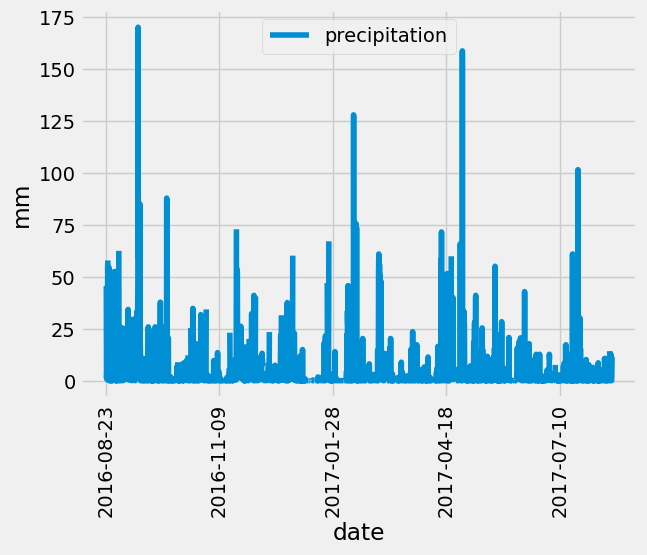

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xticks(rotation=90)
plt.ylabel('mm')

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
session.query()
session.query(func.count(Station.station)).all()

[(9,)]

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station, 
       func.avg(Measurement.tobs), 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs)]
station_temp_stats = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
station_temp_stats

[('USC00519281', 22.03582251082252, 12.2, 29.4)]

In [19]:
print(year_ago)

2016-08-23


Text(0, 0.5, 'Frequency')

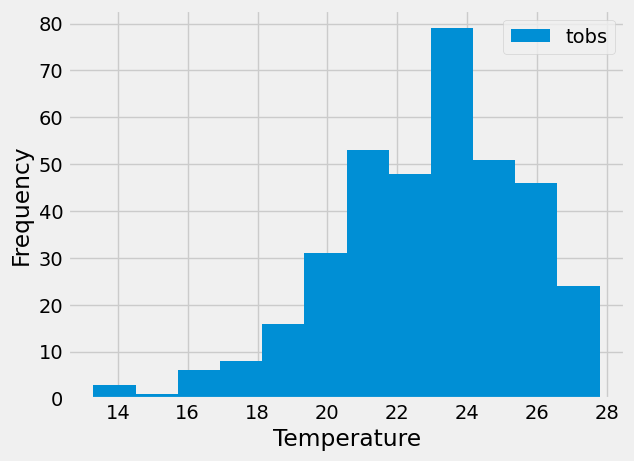

In [20]:
# filter(Measurement.date >= year_ago).\

# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_recent_station = session.query(Measurement.date, Measurement.tobs).\
                      filter(Measurement.date <= '2017, 8, 23').\
                      filter(Measurement.date >= '2016, 8, 23').\
                      filter(Measurement.station == 'USC00519281').all()

recent_station_results = pd.DataFrame(active_recent_station)

recent_station_results.plot.hist(bins=12) 
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [21]:
# Close Session
session.close()